In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [74]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [75]:
df.shape

(214, 11)

In [76]:
df.columns=['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of Glass']

In [77]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Here we have  columns with 1 target variable and rest is an feature. and toral rows is 214. And we have to predict Type of Glass which is ranging from 0 to 7 it means that it is an classification problem. So we have build classification models

In [78]:
# converting Id as an index as it is unique and dont have any relation with the target vairable

df.set_index('Id', inplace=True)

In [79]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [80]:
df.shape

(214, 10)

Here we have 214 records and 10 columns and in which 1 column is our label.

In [81]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of Glass'], dtype='object')

In [82]:
df.columns.tolist()

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of Glass']

In [83]:
df.dtypes

RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of Glass      int64
dtype: object

Here all the columns have numerical values

In [84]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

There is no null values in any columns

<AxesSubplot:ylabel='Id'>

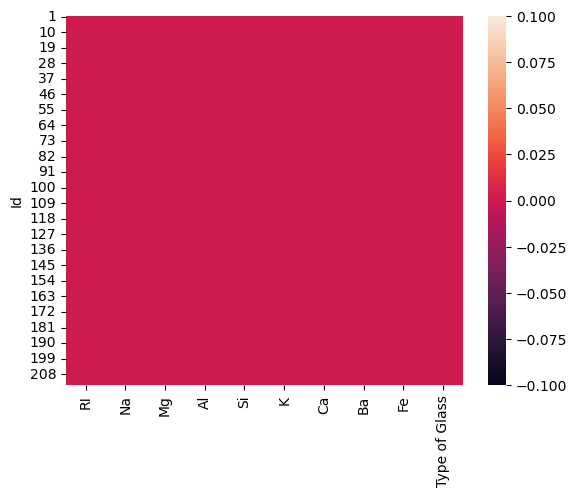

In [85]:
sns.heatmap(df.isnull())

Using heatmap we didnt find any null values

In [86]:
df.isnull().sum().sum()

0

In [87]:
# check the unique values count of each columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64


8.03    5
8.43    5
9.57    4
8.79    

As it is a classification problem we have to predict the type of glass from 1 to 7

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of Glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


Here we have 0 null values and 9 columns with float datatype and 1 column with int datatype.

In [89]:
# checking the unique values of each columns using dataframe

df.nunique().to_frame("Number of Unique Values")

,Number of Unique Values
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type of Glass,6


In [90]:
df['Type of Glass'].value_counts()  #checking unique value counts

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64

In [91]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Here there is no null values

Mean value is greater than median in Na,Al,Ca,Ba,Fe means data is skewed to right

There is an huge gap in K,Ca,Ba,Fe as compared to 75% percentile and max means outliers are present

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64


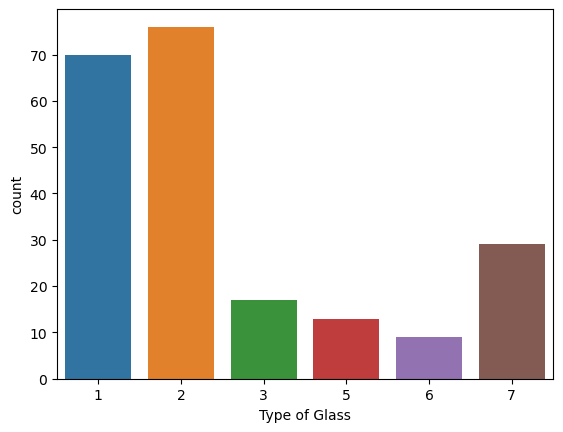

In [92]:
#visualize the number of Types of glasses using univariate analysis

ax=sns.countplot(x='Type of Glass',data=df)
print(df['Type of Glass'].value_counts())

Here type 1 and type 2 has more data count as compared to others

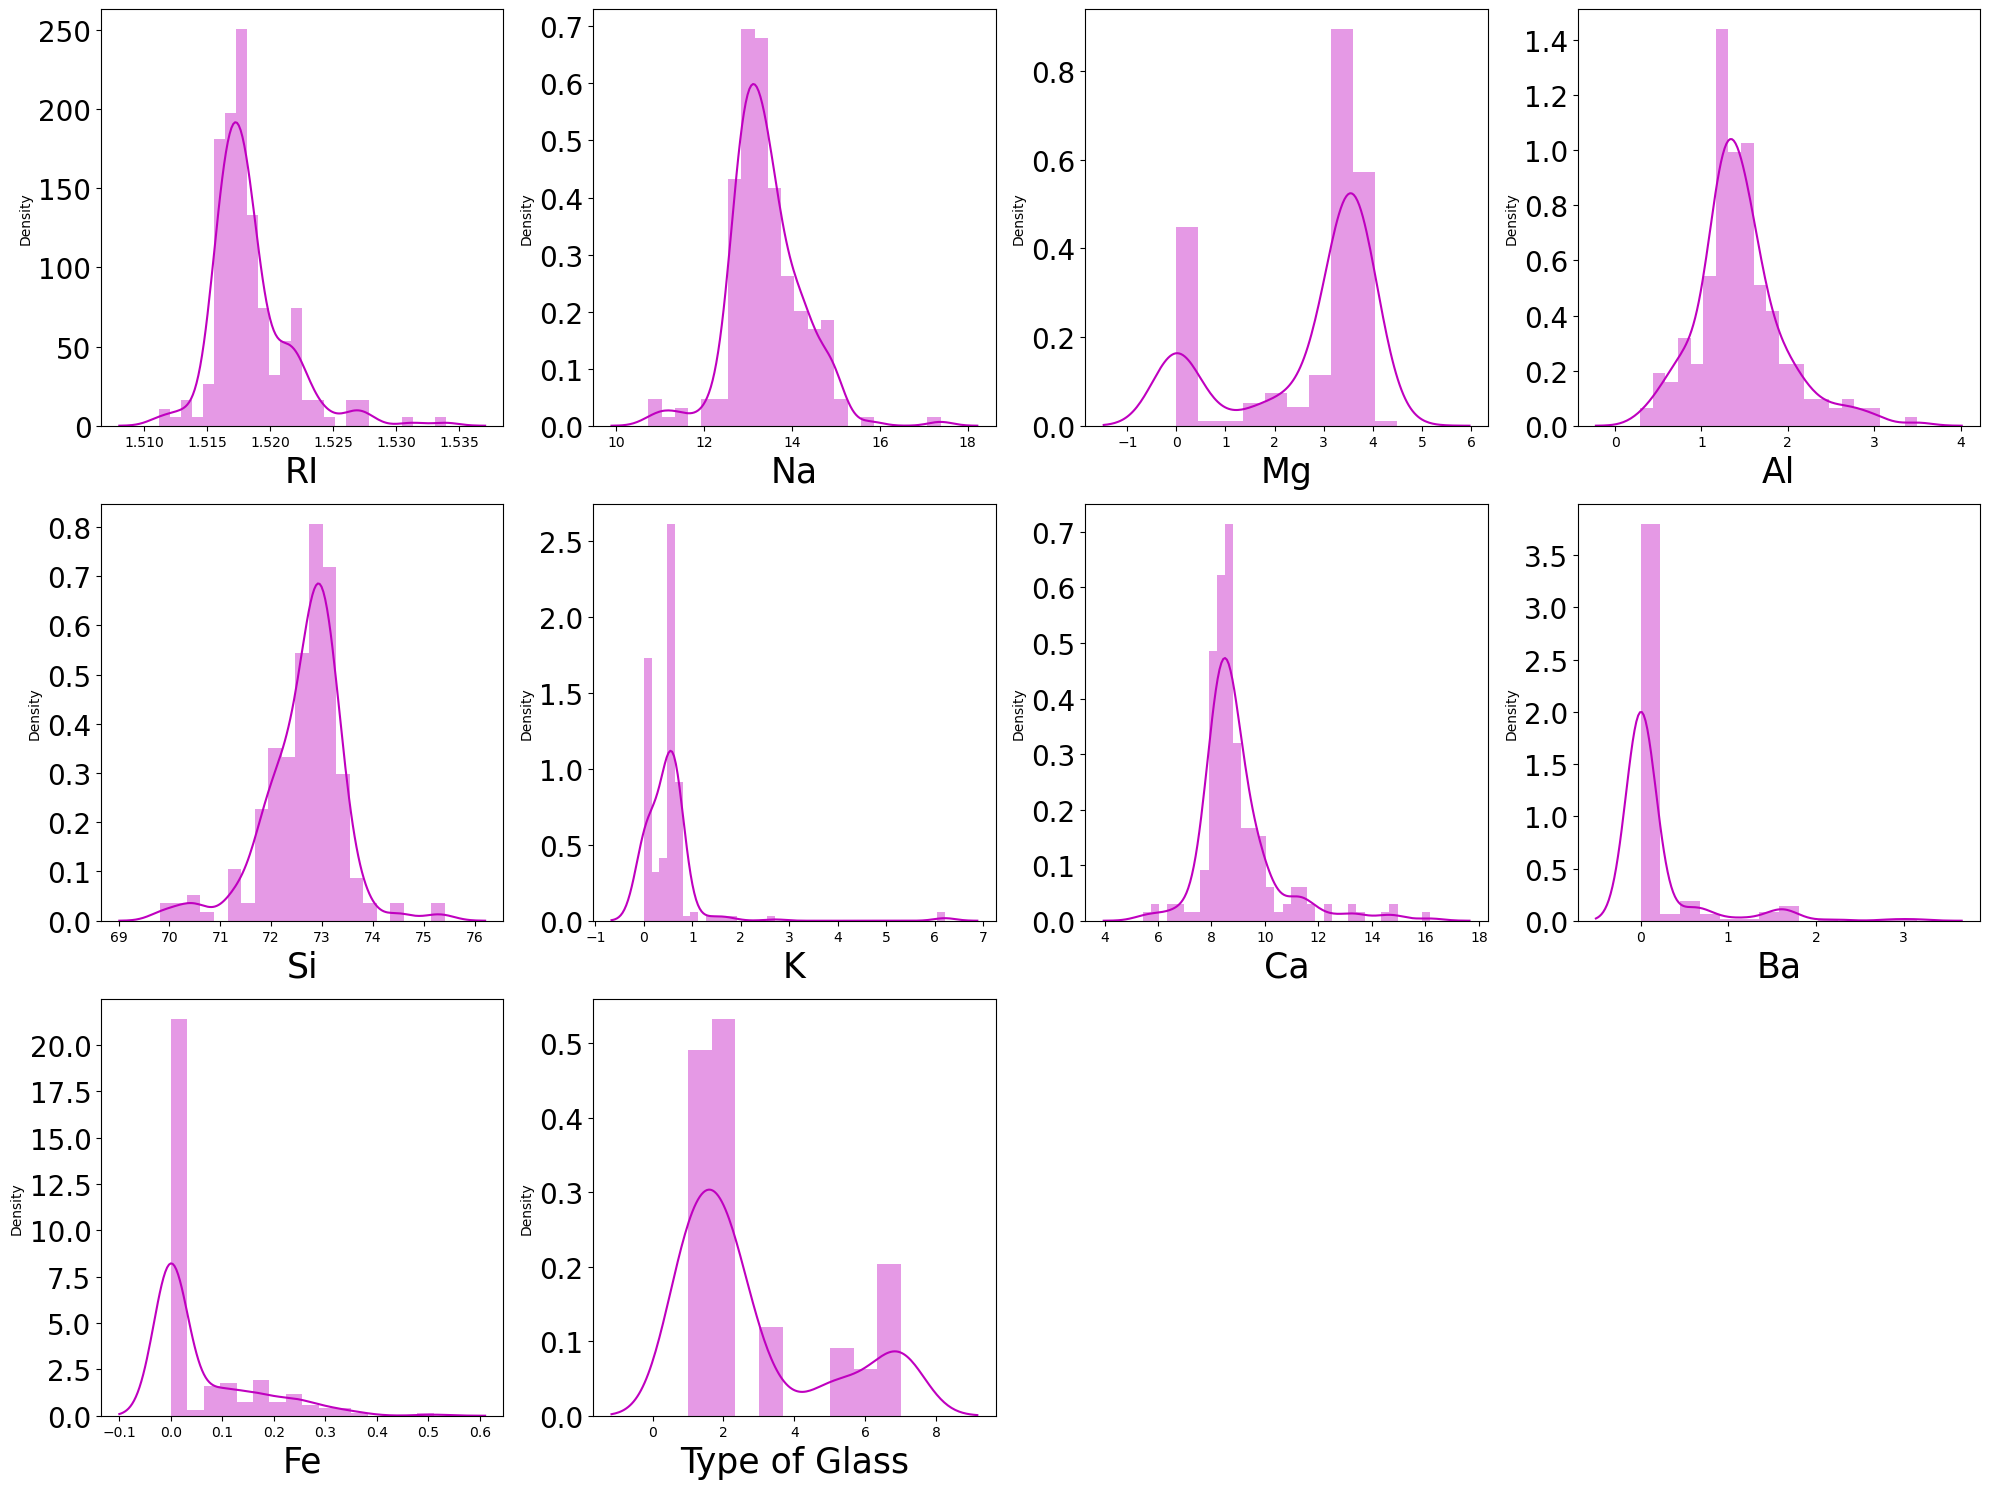

In [93]:
# lets check how data distributed to all columns

plt.figure(figsize=(20,15), facecolor='white')
plotnumber =1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col, fontsize=25)
        plt.yticks(rotation=0, fontsize=20)
    plotnumber+=1 
plt.tight_layout() 

Here data is distributed normally in Na,Mg, Al, Si,Type of glass and rest of the columns have skewness

In [94]:
df.skew()  #checking skewness

RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of Glass    1.114915
dtype: float64

Here we have skewness in all columns except Na and Si

In [95]:
# treating skewness

df["RI"]=np.cbrt(df["RI"])
df["Mg"]=np.cbrt(df["Mg"])
df["Al"]=np.cbrt(df["Al"])
df["K"]=np.cbrt(df["K"])
df["Ca"]=np.cbrt(df["Ca"])
df["Ba"]=np.cbrt(df["Ba"])
df["Fe"]=np.cbrt(df["Fe"])

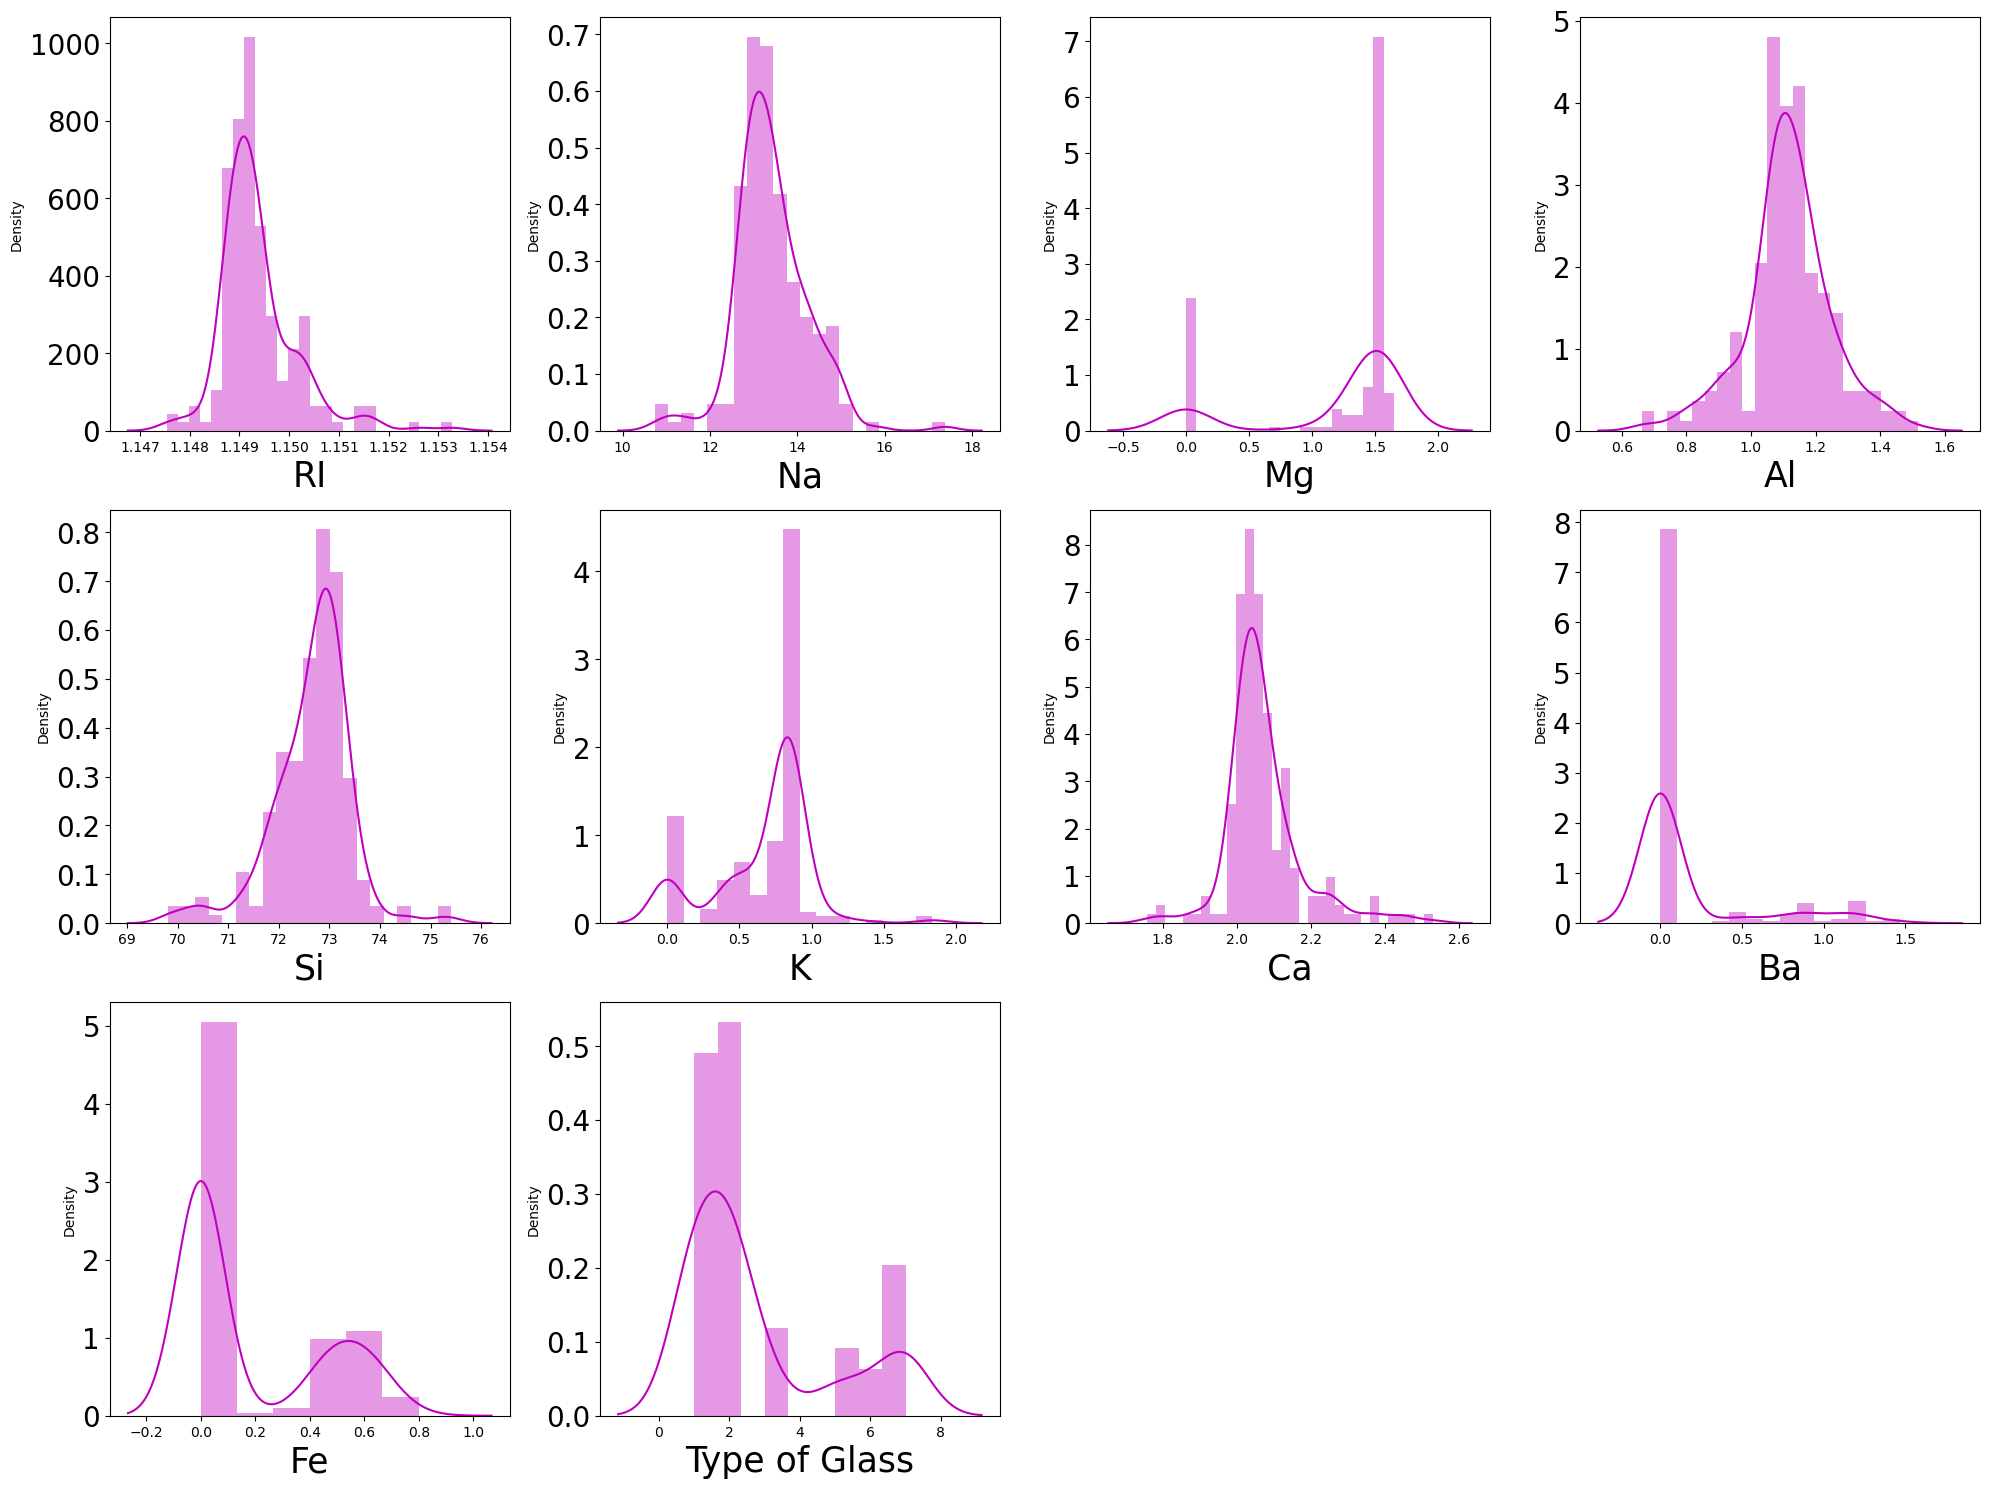

In [96]:
# lets check how data distributed to all columns

plt.figure(figsize=(20,15), facecolor='white')
plotnumber =1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col, fontsize=25)
        plt.yticks(rotation=0, fontsize=20)
    plotnumber+=1 
plt.tight_layout() 

In [97]:
df.skew()

RI               1.617049
Na               0.454181
Mg              -1.440196
Al              -0.204132
Si              -0.730447
K               -0.591896
Ca               1.407358
Ba               2.073007
Fe               0.894683
Type of Glass    1.114915
dtype: float64

Mostly we have overcome with the skewness issue

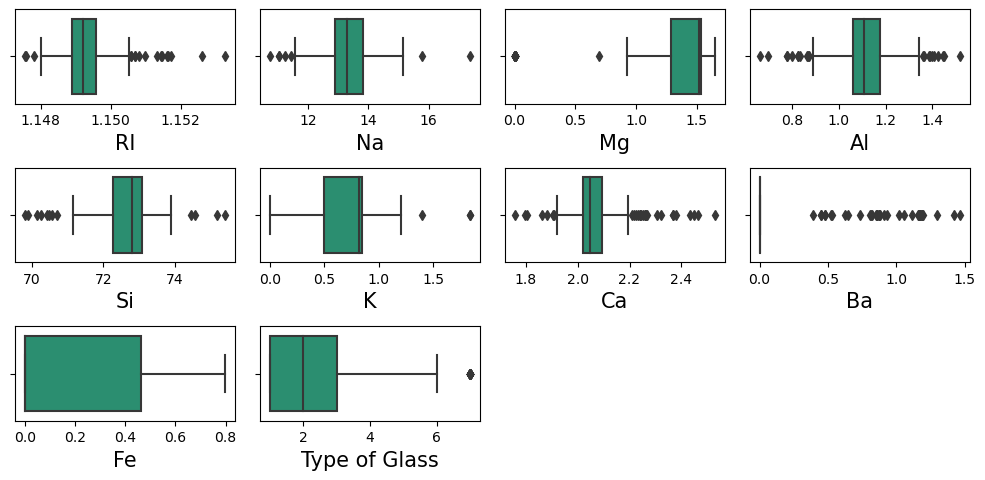

In [98]:
# lets check the outliers by usng box plot

plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[col],palette="Dark2")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()    

Here outiers presemt in all columns except Fe

In [99]:
from scipy.stats import zscore
outliers=df[['RI','Na','Mg','Al','Si','K','Ca','Ba']]
z=np.abs(zscore(outliers))
z

,RI,Na,Mg,Al,Si,K,Ca,Ba
Id,,,,,,,,
1,0.873958,0.284953,0.759032,0.634449,1.127082,0.835901,0.107657,0.439469
2,0.248977,0.591817,0.563835,0.057329,0.102319,0.346205,0.841573,0.439469
3,0.721771,0.149933,0.551954,0.300216,0.438787,0.188105,0.883072,0.439469
4,0.232451,0.242853,0.584946,0.204901,0.052974,0.485589,0.523791,0.439469
5,0.311778,0.169205,0.568556,0.313611,0.555256,0.455958,0.644800,0.439469
...,...,...,...,...,...,...,...,...
210,0.705234,0.898681,1.990475,2.344370,0.052974,0.716931,0.217776,2.317817
211,0.500215,1.856097,1.990475,1.086101,0.529374,2.018006,0.380508,2.716835
212,0.755138,1.168721,1.990475,1.134079,0.995252,2.018006,0.348946,2.749579


In [100]:
# threshold = 3
np.where(z>3)

(array([ 21, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112, 163,
        163, 163, 171, 172, 184, 184, 184, 185, 188, 201, 207], dtype=int64),
 array([3, 0, 1, 4, 7, 0, 4, 6, 6, 6, 0, 6, 3, 4, 7, 5, 5, 1, 3, 4, 6, 4,
        4, 7], dtype=int64))

In [101]:
# now removing the data which is above zscore and creating new df

df1=df[(z<3).all(axis=1)]
df1.shape

(200, 10)

Here 14 rows got deleted

In [102]:
print('Data Loss percentage', ((df.shape[0]-df1.shape[0]))/df.shape[0]*100)

Data Loss percentage 6.5420560747663545


In [103]:
df=df1

In [104]:
df.shape

(200, 10)

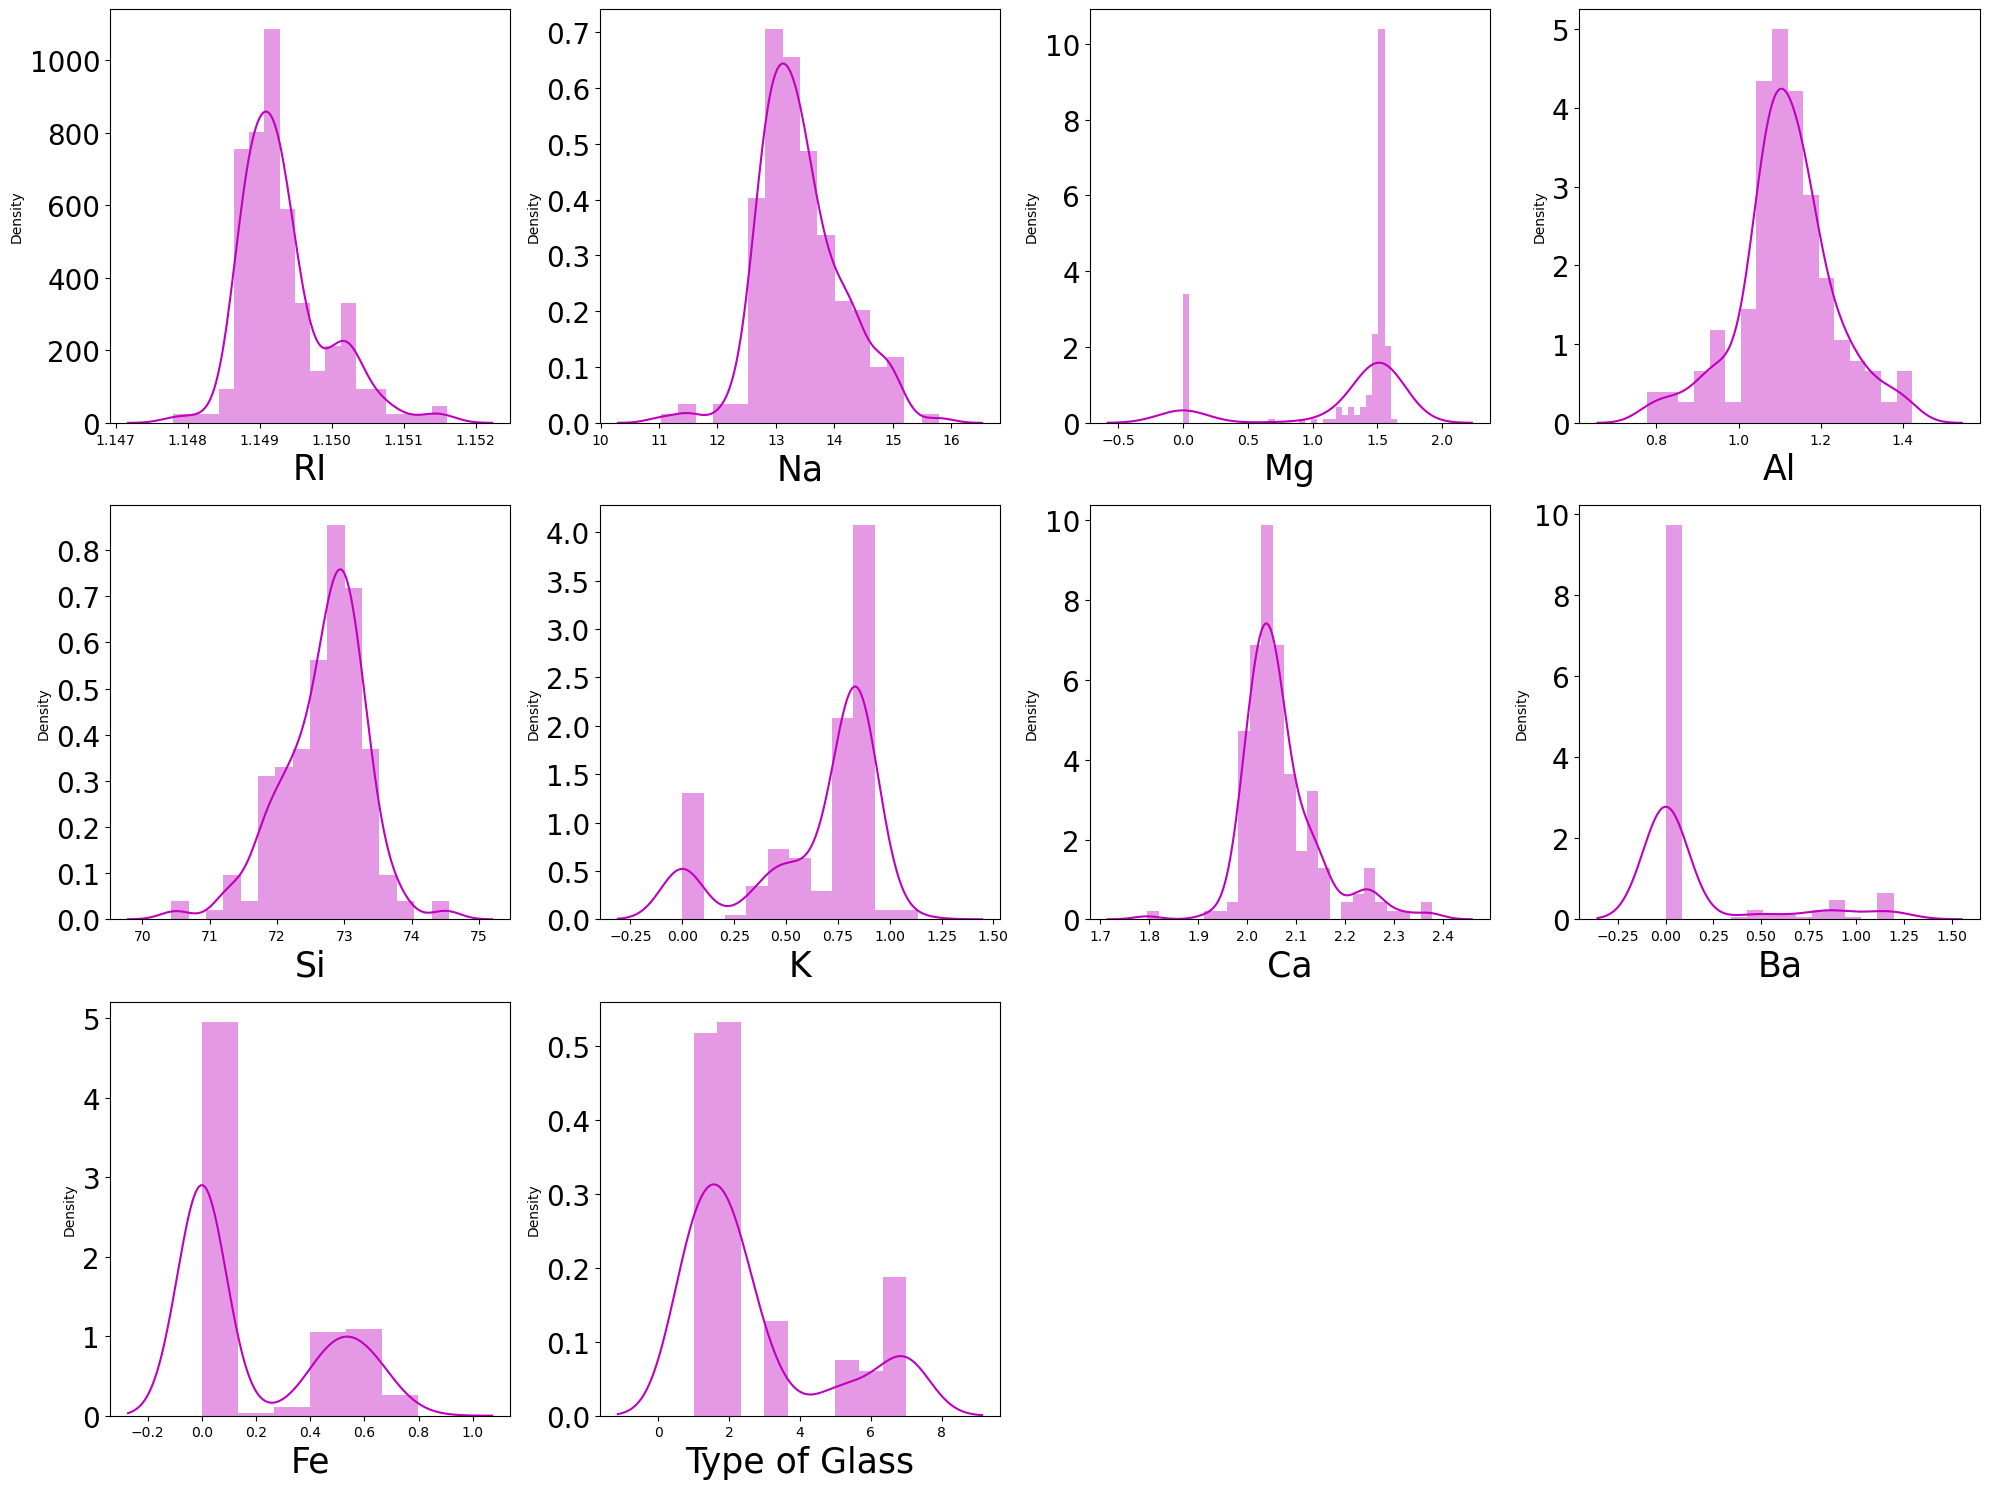

In [105]:
# lets check how data distributed to all columns

plt.figure(figsize=(20,15), facecolor='white')
plotnumber =1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col, fontsize=25)
        plt.yticks(rotation=0, fontsize=20)
    plotnumber+=1 
plt.tight_layout() 

In [106]:
df.corr() #checking correlation

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
RI,1.000000,0.047012,0.006319,-0.505099,-0.654737,-0.123602,0.697602,-0.152033,0.079808,-0.110871
Na,0.047012,1.000000,-0.481843,0.173412,-0.245896,-0.722512,-0.035470,0.580433,-0.189932,0.562354
Mg,0.006319,-0.481843,1.000000,-0.515788,-0.304454,0.611229,-0.426937,-0.647954,0.091720,-0.766939
Al,-0.505099,0.173412,-0.515788,1.000000,0.329678,-0.115594,-0.218863,0.533414,-0.074540,0.594896
Si,-0.654737,-0.245896,-0.304454,0.329678,1.000000,-0.064122,-0.209159,0.131556,-0.050980,0.209551
K,-0.123602,-0.722512,0.611229,-0.115594,-0.064122,1.000000,-0.275312,-0.538288,0.166634,-0.648037
Ca,0.697602,-0.035470,-0.426937,-0.218863,-0.209159,-0.275312,1.000000,-0.105503,0.075290,0.152963
Ba,-0.152033,0.580433,-0.647954,0.533414,0.131556,-0.538288,-0.105503,1.000000,-0.052575,0.719130
Fe,0.079808,-0.189932,0.091720,-0.074540,-0.050980,0.166634,0.075290,-0.052575,1.000000,-0.178242
Type of Glass,-0.110871,0.562354,-0.766939,0.594896,0.209551,-0.648037,0.152963,0.719130,-0.178242,1.000000


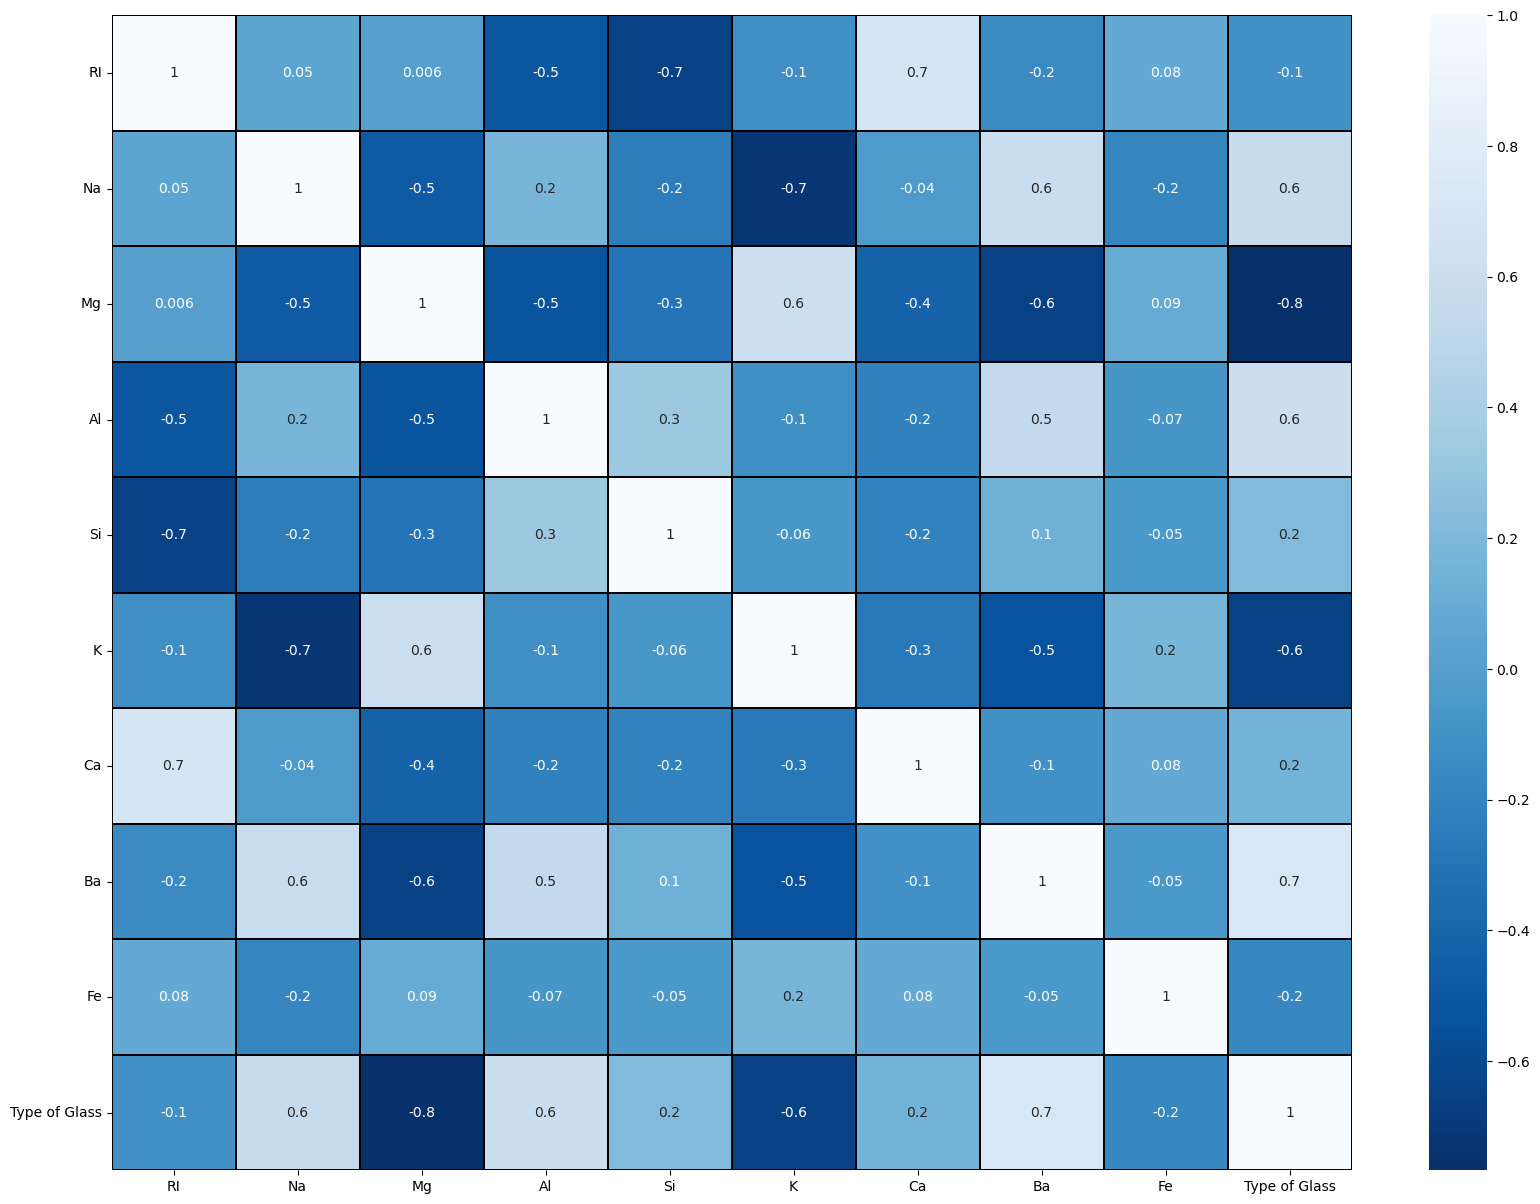

In [107]:
# visualize the correlation matrix using heat map

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1, fmt=".1g", linecolor="black", annot=True, cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

Na,Al,Ba having strong positive correltion with the target

Mg,K having negative strong correlation with the target


In [108]:
cor=df.corr()
cor["Type of Glass"].sort_values(ascending=False)

Type of Glass    1.000000
Ba               0.719130
Al               0.594896
Na               0.562354
Si               0.209551
Ca               0.152963
RI              -0.110871
Fe              -0.178242
K               -0.648037
Mg              -0.766939
Name: Type of Glass, dtype: float64

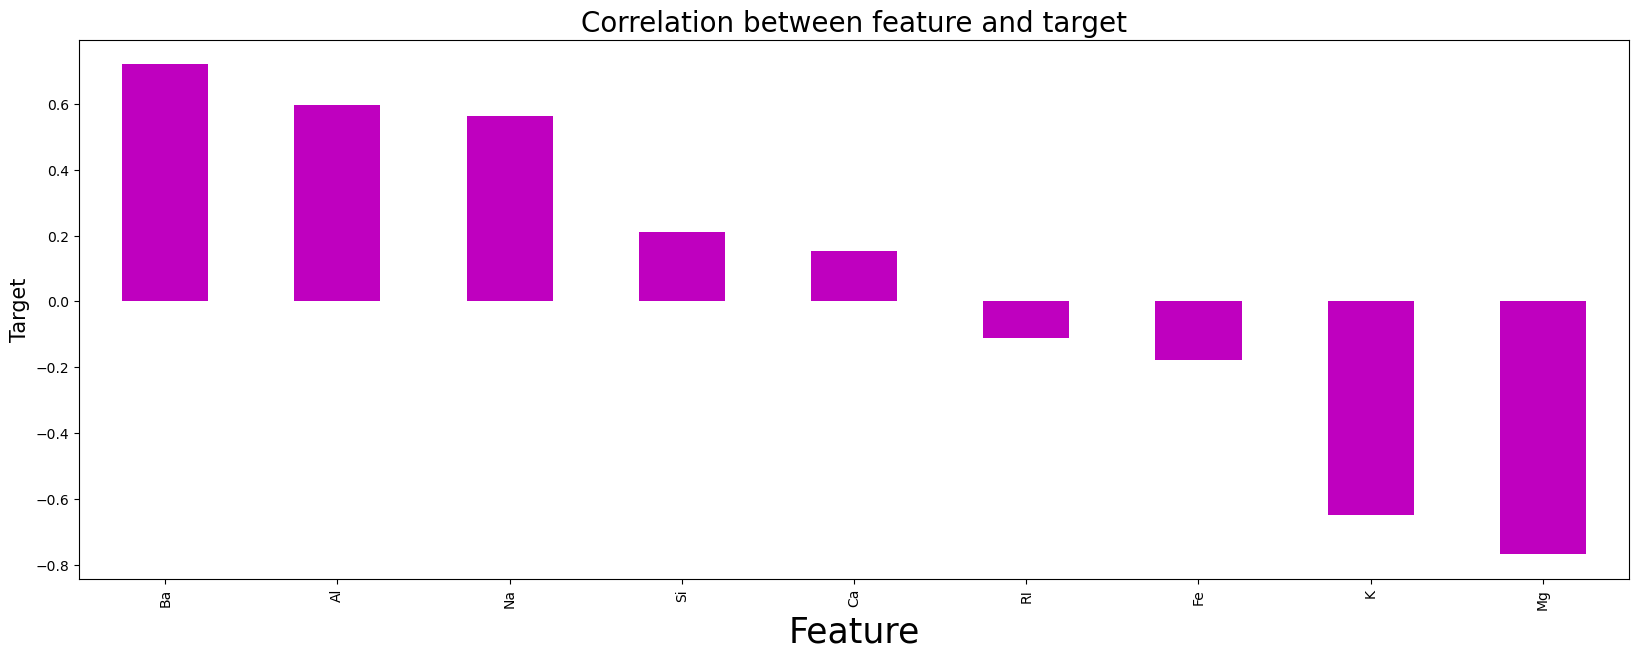

In [109]:
# visualizing the corelation between features and labels using bar plot

plt.figure(figsize=(20,7))
df.corr()['Type of Glass'].sort_values(ascending=False).drop(['Type of Glass']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=25)
plt.ylabel('Target', fontsize=15)
plt.title('Correlation between feature and target', fontsize=20)
plt.show()

Ba,AL,Na have strong positive relation with the target

K,Mg have negative strong relation with the target

In [110]:
x=df.drop("Type of Glass",axis=1)
y=df["Type of Glass"]

In [111]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.180377,0.310670,0.719637,-0.721774,-1.489089,-0.892607,-0.099839,-0.430096,-0.698823
1,-0.253212,0.666047,0.509142,-0.068815,0.053504,0.421223,-1.069278,-0.430096,-0.698823
2,-0.856802,0.154305,0.496331,0.335716,0.475687,0.245506,-1.124094,-0.430096,-0.698823
3,-0.232114,-0.300578,0.531908,-0.235779,-0.141350,0.576140,-0.649516,-0.430096,-0.698823
4,-0.333387,-0.215287,0.514234,-0.358774,0.621827,0.543207,-0.809358,-0.430096,-0.698823
...,...,...,...,...,...,...,...,...,...
195,-0.835691,1.021424,-2.245349,2.648492,-0.141350,-0.760380,0.330029,2.540150,-0.698823
196,-0.573954,2.130199,-2.245349,1.224874,0.589351,-2.206437,-0.460252,2.969987,-0.698823
197,1.028687,1.334155,-2.245349,1.279156,1.173913,-2.206437,-0.418561,3.005260,-0.698823
198,-0.717479,1.362586,-2.245349,1.133177,1.482431,-2.206437,-0.377002,2.955671,-0.698823


In [112]:
# checking variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF Values,Features
0,5.731970,RI
1,7.334615,Na
2,11.777421,Mg
3,3.168813,Al
4,5.788849,Si
5,4.230249,K
6,8.621992,Ca
7,3.678952,Ba
8,1.079898,Fe


Here Mg has has highest Vif value. But we are not dropping it because type of glass we are concluding by considering all the materials so Mg is also used as an material to make the glass

In [113]:
y.value_counts()

2    71
1    69
7    25
3    17
5    10
6     8
Name: Type of Glass, dtype: int64

Here we can see that data is imbalanced

In [114]:
#oversampling the data

!pip install imblearn
from imblearn.over_sampling import SMOTE
sm= SMOTE()
x1,y1=sm.fit_resample(x,y)

Defaulting to user installation because normal site-packages is not writeable


In [115]:
y1.value_counts()

1    71
2    71
3    71
5    71
6    71
7    71
Name: Type of Glass, dtype: int64

we can treated the overfitting of the data

Model Building

In [116]:
#finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxACCU=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACCU:
        maxACCU=acc
        maxRS=1
print("best accuracy is:", maxACCU,  "at random state:",maxRS)   

best accuracy is: 0.96875 at random state: 1


In [117]:
# creating train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

Classification Algorithms

In [118]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [119]:
#checking accuracy score for randomforestclassifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.7833333333333333
[[22  0  1  0  0  0]
 [ 7 11  1  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  2  0  0  2  0]
 [ 1  0  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.73      0.96      0.83        23
           2       0.79      0.58      0.67        19
           3       0.00      0.00      0.00         0
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         4
           7       1.00      0.91      0.95        11

    accuracy                           0.78        60
   macro avg       0.75      0.60      0.65        60
weighted avg       0.83      0.78      0.79        60



In [120]:
#checking accuracy score for Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7
[[16  4  3  0  0  0]
 [ 7 11  0  1  0  0]
 [ 0  0  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  1  3  0]
 [ 1  0  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.67      0.70      0.68        23
           2       0.69      0.58      0.63        19
           3       0.00      0.00      0.00         0
           5       0.50      0.67      0.57         3
           6       1.00      0.75      0.86         4
           7       1.00      0.91      0.95        11

    accuracy                           0.70        60
   macro avg       0.64      0.60      0.62        60
weighted avg       0.75      0.70      0.72        60



In [121]:
#checking accuracy score for support vector machine

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7
[[19  4  0  0  0]
 [ 8 10  1  0  0]
 [ 0  1  2  0  0]
 [ 0  2  0  2  0]
 [ 1  1  0  0  9]]
              precision    recall  f1-score   support

           1       0.68      0.83      0.75        23
           2       0.56      0.53      0.54        19
           5       0.67      0.67      0.67         3
           6       1.00      0.50      0.67         4
           7       1.00      0.82      0.90        11

    accuracy                           0.70        60
   macro avg       0.78      0.67      0.70        60
weighted avg       0.72      0.70      0.70        60



In [122]:
#checking accuracy score for GradientBoostingClassifier

GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.7666666666666667
[[22  0  1  0  0  0]
 [ 8 10  0  1  0  0]
 [ 0  0  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  1  1  0  2  0]
 [ 1  0  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.71      0.96      0.81        23
           2       0.83      0.53      0.65        19
           3       0.00      0.00      0.00         0
           5       0.67      0.67      0.67         3
           6       1.00      0.50      0.67         4
           7       1.00      0.91      0.95        11

    accuracy                           0.77        60
   macro avg       0.70      0.59      0.62        60
weighted avg       0.82      0.77      0.77        60



In [123]:
#checking accuracy score for AdaBoostClassifier

AB=AdaBoostClassifier()
AB.fit(x_train,y_train)
predAB=AB.predict(x_test)
print(accuracy_score(y_test,predAB))
print(confusion_matrix(y_test,predAB))
print(classification_report(y_test,predAB))

0.5333333333333333
[[ 0 23  0  0  0]
 [ 0 18  0  1  0]
 [ 0  3  0  0  0]
 [ 0  0  0  4  0]
 [ 0  1  0  0 10]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.40      0.95      0.56        19
           5       0.00      0.00      0.00         3
           6       0.80      1.00      0.89         4
           7       1.00      0.91      0.95        11

    accuracy                           0.53        60
   macro avg       0.44      0.57      0.48        60
weighted avg       0.36      0.53      0.41        60



In [124]:
#checking accuracy score for ExtraTreesClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.7666666666666667
[[19  2  2  0  0  0]
 [ 5 12  0  1  1  0]
 [ 0  0  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  4  0]
 [ 2  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.73      0.83      0.78        23
           2       0.80      0.63      0.71        19
           3       0.00      0.00      0.00         0
           5       0.67      0.67      0.67         3
           6       0.80      1.00      0.89         4
           7       1.00      0.82      0.90        11

    accuracy                           0.77        60
   macro avg       0.67      0.66      0.66        60
weighted avg       0.80      0.77      0.78        60



In [125]:
#checking accuracy score for BaggingClassifier

BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.7333333333333333
[[21  1  1  0  0  0]
 [ 6 11  2  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 1  2  0  0  1  0]
 [ 2  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.70      0.91      0.79        23
           2       0.73      0.58      0.65        19
           3       0.00      0.00      0.00         0
           5       1.00      0.67      0.80         3
           6       1.00      0.25      0.40         4
           7       1.00      0.82      0.90        11

    accuracy                           0.73        60
   macro avg       0.74      0.54      0.59        60
weighted avg       0.80      0.73      0.74        60



In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
# checking cv score for RandomForestClassifier

score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predRFC) - score.mean())*100)

[0.90697674 0.88235294 0.89411765 0.83529412 0.88235294]
0.8802188782489739
Difference between accuracy score and cross val score is - -9.68855449156406


In [128]:
# checking cv score for Logistic Regression

score1 = cross_val_score(LR,x1,y1)
print(score1)
print(score1.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predLR) - score1.mean())*100)

[0.79069767 0.81176471 0.83529412 0.78823529 0.84705882]
0.8146101231190149
Difference between accuracy score and cross val score is - -11.461012311901497


In [129]:
# checking cv score for GradientBoostingClassifier

score2 = cross_val_score(GB,x1,y1)
print(score2)
print(score2.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predGB) - score2.mean())*100)

[0.86046512 0.87058824 0.87058824 0.84705882 0.83529412]
0.8567989056087552
Difference between accuracy score and cross val score is - -9.013223894208844


In [130]:
# checking cv score for support vector machine

score3 = cross_val_score(svc,x1,y1)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predsvc) - score3.mean())*100)

[0.81395349 0.82352941 0.83529412 0.81176471 0.89411765]
0.8357318741450068
Difference between accuracy score and cross val score is - -13.573187414500687


In [131]:
# checking cv score for AdaBoostClassifier

score4 = cross_val_score(AB,x1,y1)
print(score4)
print(score4.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predAB) - score4.mean())*100)

[0.47674419 0.49411765 0.49411765 0.37647059 0.4       ]
0.4482900136798905
Difference between accuracy score and cross val score is - 8.504331965344281


In [132]:
# checking cv score for BaggingClassifier

score5 = cross_val_score(BC,x1,y1)
print(score5)
print(score5.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predBC) - score5.mean())*100)

[0.90697674 0.84705882 0.89411765 0.84705882 0.87058824]
0.8731600547195623
Difference between accuracy score and cross val score is - -13.982672138622899


In [133]:
# checking cv score for ExtraTreeClassifier

score6 = cross_val_score(ET,x1,y1)
print(score6)
print(score6.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predET) - score6.mean())*100)

[0.90697674 0.85882353 0.88235294 0.81176471 0.89411765]
0.8708071135430917
Difference between accuracy score and cross val score is - -10.414044687642498


Here AdaBoostClassifier has least difference but the score is too low so we will take our best model as GradientBoostingClassifier

Hyperparameter Tuning

In [134]:
# lets hypertune to increase the score

from sklearn.model_selection import GridSearchCV

In [135]:
grid_param={
    'max_depth' : range(4,8),
    'min_samples_split' : range(2,8,2),
    'learning_rate' : np.arange(0.1,0.3)
    
}

In [142]:
GB=GradientBoostingClassifier

GBC=GridSearchCV(GB(),param_grid=grid_param)
GBC.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [143]:
GBC.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 4}

In [144]:
final_model=GB(learning_rate=0.1,max_depth=4,min_samples_split=4)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

76.66666666666667


Saving the model

In [145]:
import joblib
joblib.dump(final_model,'Glass Identification.pkl')

['Glass Identification.pkl']

In [146]:
#lets load the saved model and get the predictions

model=joblib.load('Glass Identification.pkl')

#prediction
prediction=model.predict(x_test)
prediction

array([1, 1, 3, 2, 7, 7, 1, 1, 1, 6, 1, 1, 1, 2, 2, 1, 5, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 1, 1, 7, 1, 1, 2, 7, 7, 1, 2, 3, 2, 1, 6, 2, 2, 7, 1,
       1, 1, 1, 1, 7, 5, 2, 2, 2, 1, 1, 7, 7, 3, 7, 1], dtype=int64)

In [147]:
a=np.array(y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

,Predicted,Original
0,1,1
1,1,1
2,3,1
3,2,2
4,7,7
5,7,7
6,1,2
7,1,1
8,1,1
9,6,6
